# Project: No-Show Appointments Data Analysis.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

All of us took or will take a medical appointment in the future, and some appointments maybe assigned after several months due to high demand on a specific doctor. For sure not 100% of patients will attend their appointments! So we collect a data from a medical center that contains some information of each patient and will try to find out if we can predict if this patient will show up his appointment or not by finding out answers for the below questions:

1-What is the relashionship between Gender and No show up?

2-Can we predict if the patient will show up the appointment from their ages?

3-Does the Bosla Familia Scholarship playing role in show up appintments?

4-Does the received SMS can increase the % of showing up the appointment?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the necessary libraries for analysing the data. 

<a id='wrangling'></a>
## Data Wrangling


##### Loading the data:

In [2]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### The below are the datatype of each column(attribute):

PatientId: Identification of a patient 

AppointmentID: Identification of each appointment 

Gender: F or M

ScheduledDay:The date when the appointment was taken.

AppointmentDay: The date of the appointment.

Age = The age of the patient.

Neighbourhood = Where the appointment takes place.

Scholarship = Ture(1) of False(0).

Hipertension = Ture(1) of False(0).

Diabetes = Ture(1) of False(0).

Alcoholism = Ture(1) of False(0). 

Handcap = Ture(1) of False(0).

SMS_received = Ture(1) of False(0).

No-show = ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [3]:
df.shape

(110527, 14)

There is 110527 records and 14 columns.

In [4]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

These are the names of the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


These are the data type of each column, and the number of data/column.

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


-it seems there is some issues  with handcap data it should be either 0 or 1, but we have 4!
-also we have a mistake with the age -1! other than that it seems all are good.

In [7]:
df_age=df.query('Age<0')
df_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
sum(df.duplicated())

0

We dont have any duplicates in our Data.

In [9]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No null values in our data set.

### Data Cleaning

##### 1-Change No-show column name to NoShow.
##### 2-Fix the values of handcap other than 0 & 1, by replacing positive numbers with 1
##### 3-Deleting rows with negative ages.
##### 4-Fixing the data type for the ScheduledDay & AppointmentDay
##### 5-Delete PatientId and AppointmentID columns.¶

##### 1-Change No-show column name to NoShow.

In [10]:
df.rename(columns={'No-show':'NoShow'}, inplace=True)

No-Show column is changed to 'NoShow' to make it easier to use.

##### 2-Fix the values of handcap other than 0 & 1, by replacing positive numbers with 1¶

In [11]:
df['Handcap']=df['Handcap'].replace([2,3,4],1)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.020276,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.140942,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### 3-Deleting rows with negative ages.

In [12]:
df=df.drop(df[df.Age<0].index)
df['Age'].min()

0

##### 4-Fixing the data type for the ScheduledDay & AppointmentDay

In [13]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### 5-Delete PatientId and AppointmentID columns.

In [14]:
df.drop(['PatientId','AppointmentID'],axis=1, inplace=True)

In [15]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis




Text(0,0.5,'Proportion')

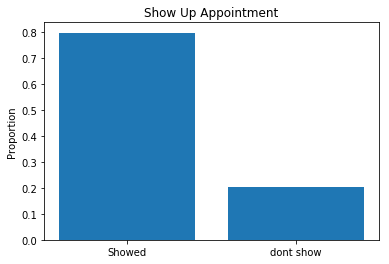

In [16]:
total=len(df)
P_show=(df['NoShow']=='No').sum()/total
P_noshow=(df['NoShow']=='Yes').sum()/total
location=[1,2]
heights=[P_show,P_noshow]
labels=['Showed','dont show']
plt.bar(location,heights,tick_label=labels)
plt.title('Show Up Appointment')
plt.ylabel('Proportion')

###### Around 70% of people show up the appointment and around 30% don't.

### What is the relashionship between Gender and No show up?

Text(0,0.5,'Number of People')

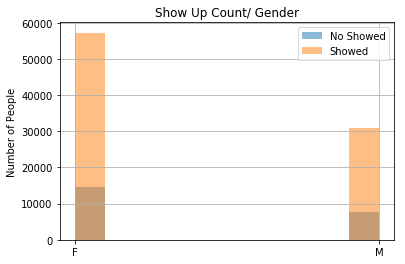

In [17]:
showed=df['NoShow']=='No'
noshowed=df['NoShow']=='Yes'

df.Gender[noshowed].hist(alpha=0.5, label='No Showed')
df.Gender[showed].hist(alpha=0.5, label='Showed')
plt.legend();
plt.title('Show Up Count/ Gender')
plt.ylabel('Number of People')

This Histogram shows that the number of females that showed up are much more than the males that showed up, and the number of females that dont show up is much more than the males that dont show up. But this is not clean since the number of females is aprox double the males.

In [18]:
f_showed=df.query('Gender=="F"')[showed].count()['Gender']/df.query('Gender=="F"').count()['Gender']
f_noshowed=df.query('Gender=="F"')[noshowed].count()['Gender']/df.query('Gender=="F"').count()['Gender']
m_showed=df.query('Gender=="M"')[showed].count()['Gender']/df.query('Gender=="M"').count()['Gender']
m_noshowed=df.query('Gender=="M"')[noshowed].count()['Gender']/df.query('Gender=="M"').count()['Gender']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Text(0,0.5,'Gender Proportion')

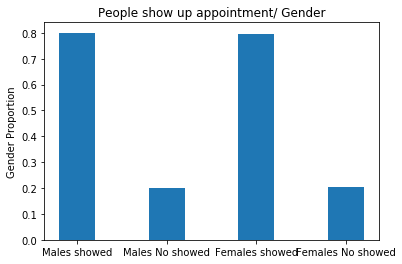

In [19]:
locations=[1,3,5,7]
heights=[m_showed,m_noshowed,f_showed,f_noshowed]
labels=['Males showed','Males No showed','Females showed','Females No showed']
plt.bar(locations,heights,tick_label=labels)
plt.title('People show up appointment/ Gender')
plt.ylabel('Gender Proportion')

This histogram shows the proportion of each male and females that showed/No-showed the appointment.
aprox. the probabilites are equal for males and females that showed up, and equal for both males and females that dont show up the appointment. 

### Can we predict if the patient will show up the appointment from their ages?

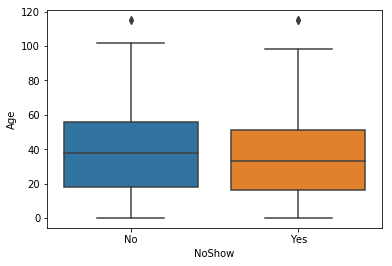

In [20]:
age_hist = sns.boxplot(x='NoShow', y='Age', data=df)

People between 20 and 50 years old are more likely to miss their appointment.



### Does the Bosla Familia Scholarship playing role in show up appintments?

Text(0,0.5,'Enrolement Proportion')

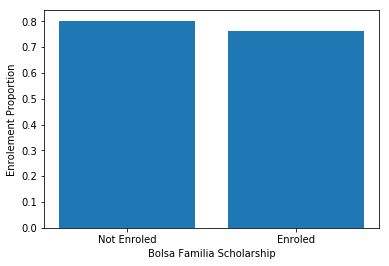

In [21]:
scholarship_sum=df.groupby(['Scholarship','NoShow']).count()['Age']
p_noscholarship_show=scholarship_sum[0,'No']/df['Scholarship'].value_counts()[0]
p_Scholarship_show=scholarship_sum[1,'No']/df['Scholarship'].value_counts()[1]
plt.bar([1,2],[p_noscholarship_show,p_Scholarship_show])
plt.xlabel('Bolsa Familia Scholarship')
plt.xticks([1,2],['Not Enroled', 'Enroled'])
plt.ylabel('Enrolement Proportion')

People not ernolled to Bosla Scholarship are more likely to show up their appointment.

### Does the received SMS can increase the % of showing up the appointment? 

Text(0,0.5,'Proportion')

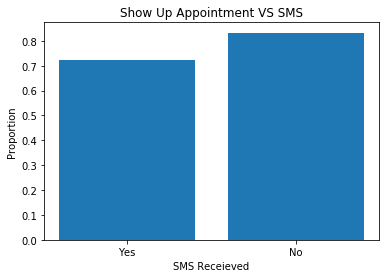

In [22]:
sms_sum=df.groupby(['SMS_received','NoShow']).count()['Age']
p_sms_show=sms_sum[1,'No']/df['SMS_received'].value_counts()[1]
p_nosms_show=sms_sum[0,'No']/df['SMS_received'].value_counts()[0]
plt.bar([1,2],[p_sms_show,p_nosms_show])
plt.title('Show Up Appointment VS SMS')
plt.xlabel('SMS Receieved')
plt.xticks([1,2],['Yes','No'])
plt.ylabel('Proportion')


People who dont receieved sms are more likely to show up their appointment than people who dont receieved an sms!

## Conclusions:

Conclusion:
After analysing the data we have with respect to (Gender, Age, Bosla Familia Scholarship, SMS receieved) I find the below results:

1- We cant pretend if the patient will show up from her/his gender, since both genders % are almost equal for showing/not showing their ppointment.

2-Patients with age between 20 and 50 years old are more likeley to miss their appointment.

3-Patients not enrolled to Bosla Familia Scholarship are showing their appointments more than the enrolled once.

4-I was shoked with SMS analysis! which shows that patients who didnt received any sms are showing up their appointment more than those who receieved the sms!

##### limitations:
In order to analyse this data in a better way and get more exact results it should contain the below:

-the specific time of the appointment is better than 00:00:00, so that we can analyse and check at what time of the day the patients are missing their appointment.

-number of SMS receieved by the patient rather than 0 and 1 (as given in the data), will help us to check whether patients who receieved more SMS will show up or not, because in my analysis SMS receieved shows negative relation with showing up!